## R SWAT Modelagem

Github do SWAT: https://github.com/sassoftware/R-swat

Action sets: https://go.documentation.sas.com/?docsetId=allprodsactions&docsetTarget=actionSetsByName.htm&docsetVersion=3.5&locale=en

Documentação: https://developer.sas.com/apis/swat/r/v1.3.0/R-swat.pdf

In [ ]:
#install.packages('https://github.com/sassoftware/R-swat/releases/download/v1.5.0/R-swat-1.5.0-linux64.tar.gz',
#                   repos=NULL, type='file')
#install.packages('https://github.com/sassoftware/R-swat/releases/download/v1.5.0/R-swat-1.5.0-win64.tar.gz',
#                   repos=NULL, type='file')


In [1]:
# Load necessary packages
library('swat')
library('ggplot2')
library('reshape2')
#options(cas.print.messages = FALSE)

SWAT 1.5.0



In [ ]:
#.authinfo file
#default user <USER> password <PASSWORD>

In [5]:
conn <- CAS('sasserver.com', 
            port=8777, protocol = "http",
            caslib = 'casuser',
             authinfo = './.authinfo')

NOTE: Connecting to CAS and generating CAS action functions for loaded

      action sets...

NOTE: To generate the functions with signatures (for tab completion), set 

      options(cas.gen.function.sig=TRUE).



In [ ]:
#conn <- CAS('sasserver.com', 
#            port=8777, protocol = "http",
#            caslib = 'casuser', 
#            username = 'username', password = 'password')

In [9]:
test <- cas.table.tableInfo(conn, caslib = 'casuser')

In [10]:
test$TableInfo

Name Rows Columns IndexedColumns Encoding CreateTimeFormatted      
1 HMEQ 5960 13      0              utf-8    2020-11-23T12:56:44-05:00
  ModTimeFormatted          AccessTimeFormatted       JavaCharSet CreateTime
1 2020-11-23T12:56:44-05:00 2020-11-23T12:56:44-05:00 UTF8        1921773404
  ... Repeated View MultiPart SourceName   SourceCaslib     Compressed Creator
1 ... 0        0    0         HMEQ.sashdat CASUSER(sasdemo) 0          sasdemo
  Modifier SourceModTimeFormatted    SourceModTime
1          2020-11-23T12:56:44-05:00 1921773404

In [11]:
cas.table.caslibInfo(conn)

$CASLibInfo
                  Name Type
1     CASUSER(sasdemo) PATH
2              Formats PATH
3             LWSVTA35 PATH
4 ModelPerformanceData PATH
5               Models PATH
6               Public PATH
7         QASMartStore PATH
8              Samples PATH
9           SystemData PATH
                                                                          Description
1                                                         Personal File System Caslib
2                                                        Stores user defined formats.
3                                                                                    
4                                   Library for Model Management performance objects.
5 Stores models created by Visual Analytics for use in other analytics or SAS Studio.
6                               Shared and writeable caslib, accessible to all users.
7                                          Stores quality analytic suite mart tables.
8                                                Stores sample data, supplied by SAS.
9                      Stores application generated data, used for general reporting.
                                                        Path Definition Subdirs
1                                     /home/sasdemo/casuser/                  1
2             /opt/sas/viya/config/data/cas/default/formats/                  0
3                               /home/sasdemo/LWSVTA35/VTXT/                  1
4 /opt/sas/viya/config/data/cas/default/modelMonitorLibrary/                  0
5              /opt/sas/viya/config/data/cas/default/models/                  0
6              /opt/sas/viya/config/data/cas/default/public/                  0
7        /opt/sas/viya/config/data/cas/default/qasMartStore/                  0
8             /opt/sas/viya/config/data/cas/default/samples/                  0
9             /opt/sas/viya/config/data/cas/default/sysData/                  0
  Local Active Personal Hidden Transient
1     0      1        1      0         1
2     0      0        0      0         0
3     0      0        0      0         0
4     0      0        0      0         0
5     0      0        0      0         0
6     0      0        0      0         0
7     0      0        0      0         0
8     0      0        0      0         0
9     0      0        0      0         0

In [12]:
## Carregando Actionsets no CAS
actionsets <- c('sampling', 'decisionTree', 'neuralNet', 'percentile')
for(i in actionsets){
    loadActionSet(conn, i)
}

NOTE: Added action set 'sampling'.

NOTE: Information for action set 'sampling':

NOTE:    sampling

NOTE:       srs -  Samples a proportion of data from the input table or partitions the data into no more than three portions

NOTE:       stratified - Samples a proportion of data or partitions the data into no more than three portions within each stratum

NOTE:       oversample - Samples a user-specified proportion of data from the event level and adjusts the ratio between rare events and non-rare events to a user-specified ratio

NOTE:       kfold - K-fold partitioning.

NOTE: Added action set 'decisionTree'.

NOTE: Information for action set 'decisionTree':

NOTE:    decisionTree

NOTE:       dtreeTrain - Trains a decision tree

NOTE:       dtreeScore - Scores a table using a decision tree model

NOTE:       dtreeSplit - Splits decision tree nodes

NOTE:       dtreePrune - Prune a decision tree

NOTE:       dtreeMerge - Merges decision tree nodes

NOTE:       dtreeCode - Generates DA

In [12]:
# Carregando dados para CAS
castbl <- cas.read.csv(conn, './data/hmeq.csv')


NOTE: Cloud Analytic Services made the uploaded file available as table HMEQ in caslib CASUSER(sasdemo).



In [ ]:
castbl

In [14]:
cas.table.tableInfo(conn)

$TableInfo
  Name Rows Columns IndexedColumns Encoding       CreateTimeFormatted
1 HMEQ 5960      13              0    utf-8 2020-08-13T14:27:03-04:00
           ModTimeFormatted       AccessTimeFormatted JavaCharSet CreateTime
1 2020-08-13T14:27:03-04:00 2020-08-13T14:27:16-04:00        UTF8 1912962423
     ModTime AccessTime Global Repeated View MultiPart SourceName SourceCaslib
1 1912962423 1912962436      0        0    0         0                        
  Compressed Creator Modifier    SourceModTimeFormatted SourceModTime
1          0 sasdemo          2020-08-13T14:27:03-04:00    1912962423

In [15]:
class(castbl)

[1] "CASTable"
attr(,"package")
[1] "swat"

In [16]:
head(castbl)

BAD LOAN MORTDUE VALUE  REASON  JOB    YOJ  DEROG DELINQ CLAGE     NINQ CLNO
1 1   1100 25860    39025 HomeImp Other  10.5   0     0     94.36667   1    9 
2 1   1300 70053    68400 HomeImp Other   7.0   0     2    121.83333   0   14 
3 1   1500 13500    16700 HomeImp Other   4.0   0     0    149.46667   1   10 
4 1   1500   NaN      NaN                 NaN NaN   NaN          NaN NaN  NaN 
5 0   1700 97800   112000 HomeImp Office  3.0   0     0     93.33333   0   14 
6 1   1700 30548    40320 HomeImp Other   9.0   0     0    101.46600   1    8 
  DEBTINC 
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6 37.11361

In [ ]:
summary(castbl)

In [18]:
table <- cas.simple.summary(castbl)

In [19]:
table

$Summary
    Column          Min         Max    N NMiss         Mean          Sum
1      BAD    0.0000000      1.0000 5960     0 1.994966e-01      1189.00
2     LOAN 1100.0000000  89900.0000 5960     0 1.860797e+04 110903500.00
3  MORTDUE 2063.0000000 399550.0000 5442   518 7.376082e+04 401406367.20
4    VALUE 8000.0000000 855909.0000 5848   112 1.017760e+05 595186333.04
5      YOJ    0.0000000     41.0000 5445   515 8.922268e+00     48581.75
6    DEROG    0.0000000     10.0000 5252   708 2.545697e-01      1337.00
7   DELINQ    0.0000000     15.0000 5380   580 4.494424e-01      2418.00
8    CLAGE    0.0000000   1168.2336 5652   308 1.797663e+02   1016038.99
9     NINQ    0.0000000     17.0000 5450   510 1.186055e+00      6464.00
10    CLNO    0.0000000     71.0000 5738   222 2.129610e+01    122197.00
11 DEBTINC    0.5244992    203.3121 4693  1267 3.377992e+01    158529.14
            Std       StdErr          Var          USS          CSS        CV
1  3.996555e-01 5.176815e-03 1.597245e-01 1.189000e+03 9.517985e+02 200.33195
2  1.120748e+04 1.451727e+02 1.256076e+08 2.812185e+12 7.484958e+11  60.22946
3  4.445761e+04 6.026523e+02 1.976479e+09 4.036208e+13 1.075402e+13  60.27266
4  5.738578e+04 7.504134e+02 3.293127e+09 7.983063e+13 1.925491e+13  56.38436
5  7.573982e+00 1.026421e-01 5.736521e+01 7.457556e+05 3.122962e+05  84.88853
6  8.460468e-01 1.167433e-02 7.157951e-01 4.099000e+03 3.758640e+03 332.34388
7  1.127266e+00 1.536863e-02 1.270728e+00 7.922000e+03 6.835248e+03 250.81434
8  8.581009e+01 1.141398e+00 7.363372e+03 2.242600e+08 4.161041e+07  47.73425
9  1.728675e+00 2.341613e-02 2.988317e+00 2.395000e+04 1.628334e+04 145.74998
10 1.013893e+01 1.338480e-01 1.027980e+02 3.192071e+06 5.897519e+05  47.60935
11 8.601746e+00 1.255629e-01 7.399004e+01 5.702262e+06 3.471613e+05  25.46408
      TValue         ProbT  Skewness   Kurtosis
1   38.53656 2.720203e-290 1.5043167  0.2630568
2  128.17819  0.000000e+00 2.0237807  6.9325898
3  122.39365  0.000000e+00 1.8144807  6.4818663
4  135.62664  0.000000e+00 3.0533443 24.3628049
5   86.92605  0.000000e+00 0.9884601  0.3720725
6   21.80593 5.478603e-101 5.3208703 36.8727634
7   29.24414 1.326786e-174 4.0231496 23.5654487
8  157.49651  0.000000e+00 1.3434120  7.5995493
9   50.65120  0.000000e+00 2.6219842  9.7865073
10 159.10653  0.000000e+00 0.7750518  1.1576727
11 269.02783  0.000000e+00 2.8523534 50.5040415

In [20]:
table$Summary[c(1:3),c('Min', 'Max')]

Min  Max   
1    0      1
2 1100  89900
3 2063 399550

In [21]:
# Trazer dados para maquina local
df <- to.casDataFrame(castbl, obs = nrow(castbl))

In [22]:
head(df)

BAD LOAN MORTDUE VALUE  REASON  JOB    YOJ  DEROG DELINQ CLAGE     NINQ CLNO
1 1   1100 25860    39025 HomeImp Other  10.5   0     0     94.36667   1    9 
2 1   1300 70053    68400 HomeImp Other   7.0   0     2    121.83333   0   14 
3 1   1500 13500    16700 HomeImp Other   4.0   0     0    149.46667   1   10 
4 1   1500   NaN      NaN                 NaN NaN   NaN          NaN NaN  NaN 
5 0   1700 97800   112000 HomeImp Office  3.0   0     0     93.33333   0   14 
6 1   1700 30548    40320 HomeImp Other   9.0   0     0    101.46600   1    8 
  DEBTINC 
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6 37.11361

In [23]:
# Formatacao de dados
d <- melt(df[sapply(df, is.numeric)], id.vars=NULL)
head(d)

variable value
1 BAD      1    
2 BAD      1    
3 BAD      1    
4 BAD      1    
5 BAD      0    
6 BAD      1

In [24]:
tail(d)

variable value   
65555 DEBTINC       NaN
65556 DEBTINC  36.08804
65557 DEBTINC  36.75365
65558 DEBTINC  36.26269
65559 DEBTINC  34.75116
65560 DEBTINC  34.24246

Warning message:
"Removed 4740 rows containing non-finite values (stat_bin)."


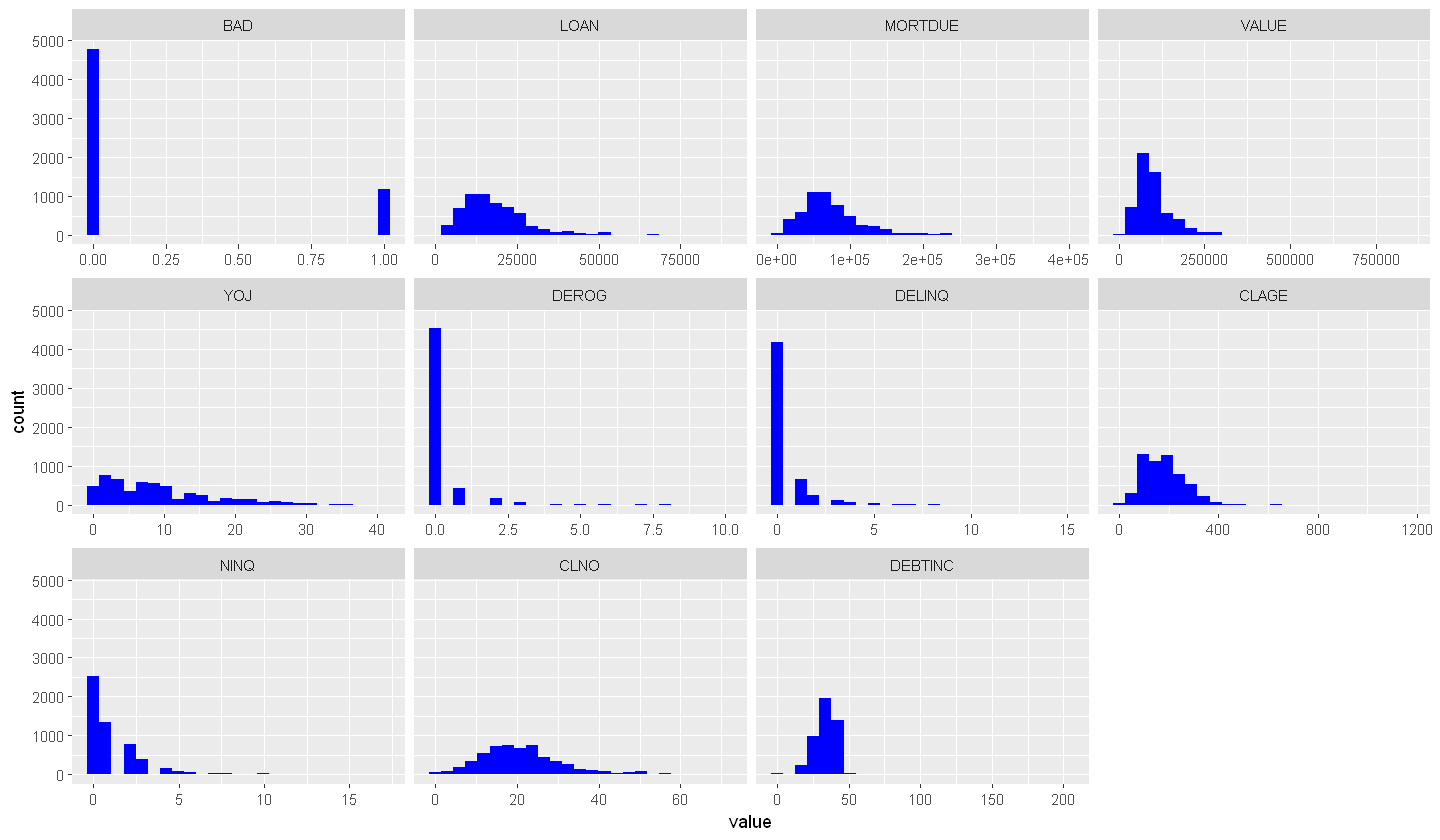

In [25]:
options(repr.plot.width=12, repr.plot.height=7)

ggplot(d, aes(x = value)) +
    geom_histogram(fill = 'blue', bins = 25) +
    facet_wrap(~variable,
               scales = 'free_x') 

In [26]:
cas.table.promote(conn, name = 'hmeq')

ERROR: The target table hmeq of the promotion already exists. Please specify a different name.

ERROR: The action stopped due to errors.



list()

In [27]:
# Ver dados faltantes de todas variaveis
tbl <- cas.simple.distinct(castbl)
tbl$Distinct

Column  NDistinct NMiss Trunc
1  BAD        2         0  0    
2  LOAN     540         0  0    
3  MORTDUE 5054       518  0    
4  VALUE   5382       112  0    
5  REASON     3       252  0    
6  JOB        7       279  0    
7  YOJ      100       515  0    
8  DEROG     12       708  0    
9  DELINQ    15       580  0    
10 CLAGE   5315       308  0    
11 NINQ      17       510  0    
12 CLNO      63       222  0    
13 DEBTINC 4694      1267  0

In [28]:
tbl <- tbl$Distinct

In [29]:
tbl

Column  NDistinct NMiss Trunc
1  BAD        2         0  0    
2  LOAN     540         0  0    
3  MORTDUE 5054       518  0    
4  VALUE   5382       112  0    
5  REASON     3       252  0    
6  JOB        7       279  0    
7  YOJ      100       515  0    
8  DEROG     12       708  0    
9  DELINQ    15       580  0    
10 CLAGE   5315       308  0    
11 NINQ      17       510  0    
12 CLNO      63       222  0    
13 DEBTINC 4694      1267  0

In [30]:
# Pegando dados missing
cas.nmiss(castbl)

BAD    LOAN MORTDUE   VALUE     YOJ   DEROG  DELINQ   CLAGE    NINQ    CLNO 
      0       0     518     112     515     708     580     308     510     222 
DEBTINC 
   1267

In [31]:
# Visualizacao de missing
tbl$PctMiss <- tbl$NMiss/nrow(castbl)

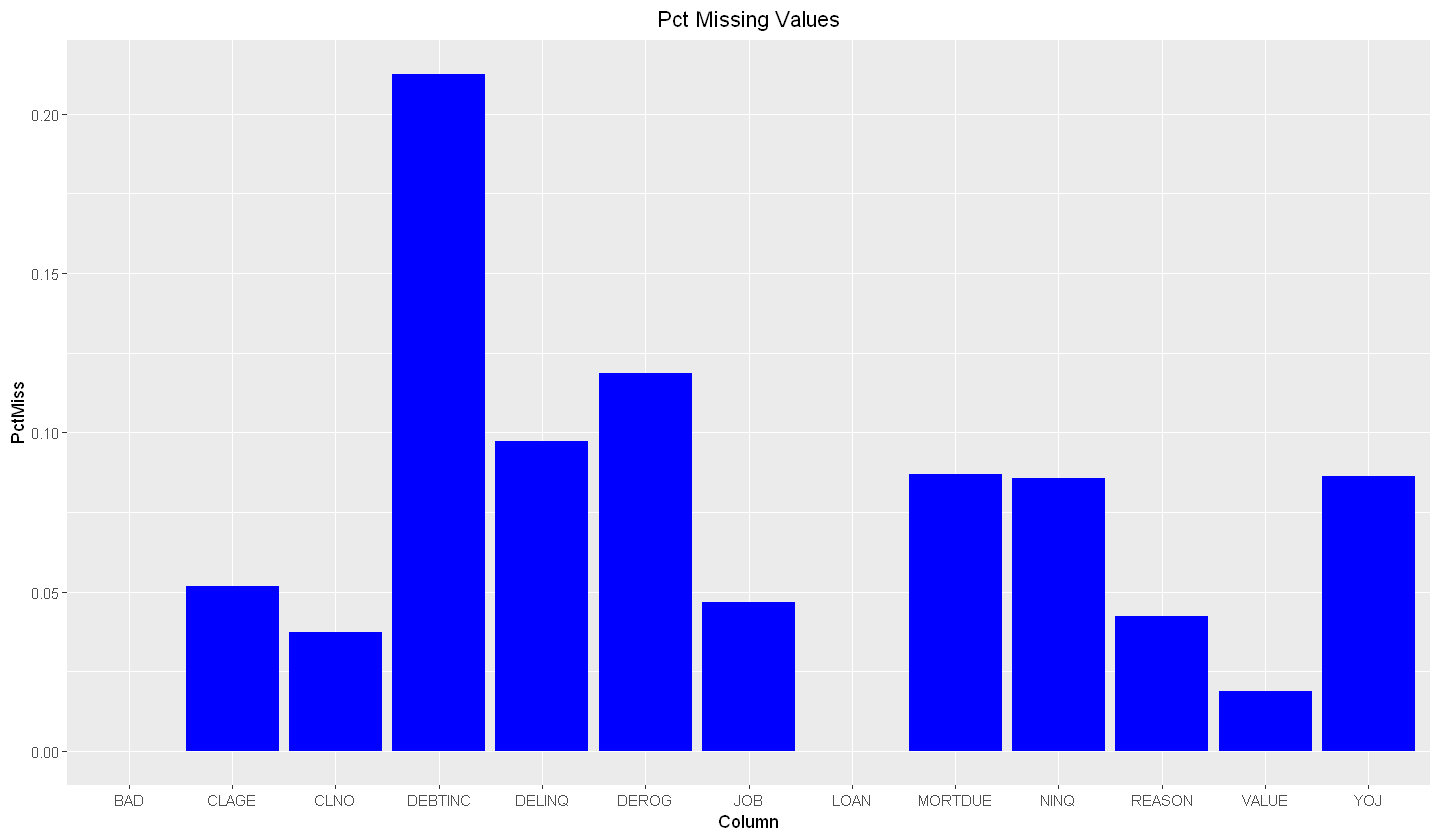

In [32]:
ggplot(tbl, aes(Column, PctMiss)) +
    geom_col(fill = 'blue') +
    ggtitle('Pct Missing Values') +
    theme(plot.title = element_text(hjust = 0.5))

In [33]:
colnames(castbl)[-1]

[1] "LOAN"    "MORTDUE" "VALUE"   "REASON"  "JOB"     "YOJ"     "DEROG"  
 [8] "DELINQ"  "CLAGE"   "NINQ"    "CLNO"    "DEBTINC"

In [34]:
# Imputacao de dados missing
cas.dataPreprocess.impute(castbl,
    methodContinuous = 'MEDIAN',
    methodNominal = 'MODE',
    inputs = colnames(castbl)[-1],
    copyAllVars = TRUE,
    casOut = list(name = 'hmeq', 
                replace = TRUE)
)

$ImputeInfo
   Variable ImputeTech   ResultVar    N NMiss ImputedValueContinuous
1      LOAN     Median    IMP_LOAN 5960     0            16300.00000
2   MORTDUE     Median IMP_MORTDUE 5442   518            65019.00000
3     VALUE     Median   IMP_VALUE 5848   112            89235.50000
4    REASON       Mode  IMP_REASON 5708   252                    NaN
5       JOB       Mode     IMP_JOB 5681   279                    NaN
6       YOJ     Median     IMP_YOJ 5445   515                7.00000
7     DEROG     Median   IMP_DEROG 5252   708                0.00000
8    DELINQ     Median  IMP_DELINQ 5380   580                0.00000
9     CLAGE     Median   IMP_CLAGE 5652   308              173.46667
10     NINQ     Median    IMP_NINQ 5450   510                1.00000
11     CLNO     Median    IMP_CLNO 5738   222               20.00000
12  DEBTINC     Median IMP_DEBTINC 4693  1267               34.81826
   ImputedValueNominal
1                     
2                     
3                     
4              DebtCon
5                Other
6                     
7                     
8                     
9                     
10                    
11                    
12                    

$OutputCasTables
            casLib Name Rows Columns
1 CASUSER(sasdemo) hmeq 5960      25

In [35]:
# Particionamento de dados
cas.sampling.srs(conn,
    table = 'hmeq',
    samppct = 30,
    partind = TRUE,
    output = list(casOut = list(name = 'hmeq', replace = TRUE), 
                  copyVars = 'ALL')
)

NOTE: Simple Random Sampling is in effect.

NOTE: Using SEED=1893851800 for sampling.



$OutputCasTables
            casLib Name Label Rows Columns
1 CASUSER(sasdemo) hmeq       5960      26

$SRSFreq
  NObs NSamp
1 5960  1788

In [36]:
hmeq1 <- defCasTable(conn, 'hmeq')

In [37]:
head(hmeq1)

BAD LOAN MORTDUE VALUE  REASON  JOB    YOJ  DEROG DELINQ CLAGE     ...
1 1   1100 25860    39025 HomeImp Other  10.5   0     0     94.36667 ...
2 1   1300 70053    68400 HomeImp Other   7.0   0     2    121.83333 ...
3 1   1500 13500    16700 HomeImp Other   4.0   0     0    149.46667 ...
4 1   1500   NaN      NaN                 NaN NaN   NaN          NaN ...
5 0   1700 97800   112000 HomeImp Office  3.0   0     0     93.33333 ...
6 1   1700 30548    40320 HomeImp Other   9.0   0     0    101.46600 ...
  IMP_DELINQ IMP_DEROG IMP_LOAN IMP_MORTDUE IMP_NINQ IMP_VALUE IMP_YOJ IMP_JOB
1 0          0         1100     25860       1         39025.0  10.5    Other  
2 2          0         1300     70053       0         68400.0   7.0    Other  
3 0          0         1500     13500       1         16700.0   4.0    Other  
4 0          0         1500     65019       1         89235.5   7.0    Other  
5 0          0         1700     97800       0        112000.0   3.0    Office 
6 0          0         1700     30548       1         40320.0   9.0    Other  
  IMP_REASON _PartInd_
1 HomeImp    1        
2 HomeImp    0        
3 HomeImp    0        
4 DebtCon    1        
5 HomeImp    1        
6 HomeImp    1

In [38]:
indata <- 'hmeq'

# Pega infromacao das variaveis
colinfo <- head(cas.table.columnInfo(conn, table = indata)$ColumnInfo, -1)

In [39]:
# Variavel target
target <- colinfo$Column[1]


In [40]:
# Separacao para modelos que lidam com missing
inputs <- colinfo$Column[-1]
nominals <- c(target, subset(colinfo, Type == 'varchar')$Column)

In [41]:
# Separacao para modelos que nao lidam com missing
imp.inputs <- grep('IMP_', inputs, value = T)
imp.nominals <- c(target, grep('IMP_', nominals, value = T))

In [42]:
# Treina modelos
## Arvore de decisão
cas.decisionTree.dtreeTrain(conn,
    table = list(name = indata, where = '_PartInd_ = 0'),
    target = target,
    inputs = inputs,
    nominals = nominals,
    varImp = TRUE,
    casOut = list(name = 'dt_model', replace = TRUE)
)

$DTreeVarImpInfo
      Variable Importance       Std Count
1      DEBTINC 484.554781 0.0000000     1
2        VALUE  36.786187 3.7347029     2
3       DELINQ  35.608993 8.7182870     2
4    IMP_CLAGE  34.781875 0.0000000     1
5          JOB  18.080323 2.9795555     2
6        DEROG  16.468738 0.1567292     2
7        CLAGE   7.147762 2.1427856     2
8         NINQ   4.816667 0.0000000     1
9      MORTDUE   2.563126 0.2422466     2
10 IMP_DEBTINC   1.987755 0.0000000     1

$ModelInfo
                          Descr     Value
1          Number of Tree Nodes   33.0000
2        Max Number of Branches    2.0000
3              Number of Levels    6.0000
4              Number of Leaves   17.0000
5                Number of Bins   50.0000
6        Minimum Size of Leaves    5.0000
7        Maximum Size of Leaves 3097.0000
8           Number of Variables   24.0000
9  Confidence Level for Pruning    0.2500
10  Number of Observations Used 4172.0000
11  Misclassification Error (%)   10.5465

$OutputCasTables
            casLib     Name Rows Columns
1 CASUSER(sasdemo) dt_model   33      40

In [43]:
### Prevendo um unico modelo
cas.decisionTree.dtreeScore(
    object       = hmeq1,
    modelTable   = list(name = 'dt_model'),
    copyVars     = list(target, '_PartInd_'),
    assessonerow = TRUE,
    casOut       = list(name = 'dt_scored', replace = T)
)

$OutputCasTables
            casLib      Name Rows Columns
1 CASUSER(sasdemo) dt_scored 5960      16

$ScoreInfo
                        Descr                            Value
1 Number of Observations Read                             5960
2 Number of Observations Used                             5960
3 Misclassification Error (%)                     11.208053691

In [44]:
dt_scores <- defCasTable(conn, 'dt_scored')

In [45]:
head(dt_scores)

BAD _PartInd_ _DT_PredName_ _DT_PredP_ _DT_PredLevel_ _LeafID_ _MissIt_
1 1   1                    1  0.7103594  0              25       0       
2 1   0                    1  0.7103594  0              25       0       
3 1   0                    1  0.7103594  0              25       0       
4 1   1                    1  1.0000000  0               4       0       
5 0   1                    1  0.7103594  0              25       1       
6 1   1                    0  0.9483371  1              32       1       
  _NumNodes_ _NodeList0_ _NodeList1_ _NodeList2_ _NodeList3_ _NodeList4_
1 6          0           1           3             8          16        
2 6          0           1           3             8          16        
3 6          0           1           3             8          16        
4 3          0           1           4           NaN         NaN        
5 6          0           1           3             8          16        
6 6          0           2           5            10          20        
  _NodeList5_ _DT_P_           1 _DT_P_           0
1  25         0.7103594          0.2896406         
2  25         0.7103594          0.2896406         
3  25         0.7103594          0.2896406         
4 NaN         1.0000000          0.0000000         
5  25         0.7103594          0.2896406         
6  32         0.0516629          0.9483371

In [46]:
## Random Forest
cas.decisionTree.forestTrain(conn,
    table = list(name = indata, where = '_PartInd_ = 0'),
    target = target,
    inputs = inputs,
    nominals = nominals,
    casOut = list(name = 'rf_model', replace = TRUE)
)

$ModelInfo
                              Descr      Value
1                   Number of Trees   50.00000
2  Number of Selected Variables (M)    5.00000
3                Random Number Seed    0.00000
4          Bootstrap Percentage (%)   63.21206
5                    Number of Bins   50.00000
6               Number of Variables   24.00000
7      Confidence Level for Pruning    0.25000
8          Max Number of Tree Nodes   39.00000
9          Min Number of Tree Nodes   23.00000
10           Max Number of Branches    2.00000
11           Min Number of Branches    2.00000
12             Max Number of Levels    6.00000
13             Min Number of Levels    6.00000
14             Max Number of Leaves   20.00000
15             Min Number of Leaves   12.00000
16           Maximum Size of Leaves 2399.00000
17           Minimum Size of Leaves    5.00000
18               Out-of-Bag MCR (%)        NaN
19         Average number of Leaves   16.56000

$OutputCasTables
            casLib     Name Rows Columns
1 CASUSER(sasdemo) rf_model 1606      42

In [47]:
## Gradient Boosting
cas.decisionTree.gbtreeTrain(conn,
    table = list(name = indata, where = '_PartInd_ = 0'),
    target = target,
    inputs = inputs,
    nominals = nominals,
    casOut = list(name = 'gbt_model', replace = TRUE)
)

$ModelInfo
                              Descr   Value
1                   Number of Trees   50.00
2                      Distribution    2.00
3                     Learning Rate    0.10
4                  Subsampling Rate    0.50
5  Number of Selected Variables (M)   24.00
6                    Number of Bins   50.00
7               Number of Variables   24.00
8          Max Number of Tree Nodes   31.00
9          Min Number of Tree Nodes   19.00
10           Max Number of Branches    2.00
11           Min Number of Branches    2.00
12             Max Number of Levels    5.00
13             Min Number of Levels    5.00
14             Max Number of Leaves   16.00
15             Min Number of Leaves   10.00
16           Maximum Size of Leaves 1584.00
17           Minimum Size of Leaves    5.00
18               Random Number Seed    0.00
19               Lasso (L1) penalty    0.00
20               Ridge (L2) penalty    1.00
21           Actual Number of Trees   50.00
22         Average number of Leaves   14.12

$OutputCasTables
            casLib      Name Rows Columns
1 CASUSER(sasdemo) gbt_model 1362      32

In [48]:
## Neural Network
cas.neuralNet.annTrain(conn,
    table = list(name = indata, where = '_PartInd_ = 0'),
    target = target,
    inputs = imp.inputs,
    hidden = 7,
    nominals = imp.nominals,
    casOut = list(name = 'nn_model', replace = TRUE)
)

$ConvergenceStatus
                                          Reason
1 The optimization exited on maximum iterations.

$ModelInfo
                         Descr        Value
1                        Model   Neural Net
2  Number of Observations Used         4172
3  Number of Observations Read         4172
4     Target/Response Variable          BAD
5              Number of Nodes           27
6        Number of Input Nodes           18
7       Number of Output Nodes            2
8       Number of Hidden Nodes            7
9      Number of Hidden Layers            1
10 Number of Weight Parameters          133
11   Number of Bias Parameters            9
12                Architecture          MLP
13       Number of Neural Nets            1
14             Objective Value 1.4946123182

$OptIterHistory
   Progress Objective     Loss  FitError
1         1  2.827515 2.827515 0.4000479
2         2  1.924249 1.924249 0.2039789
3         3  1.762547 1.762547 0.1907958
4         4  1.593433 1.593433 0.1665868
5         5  1.565639 1.565639 0.1601151
6         6  1.544425 1.544425 0.1529243
7         7  1.529771 1.529771 0.1522052
8         8  1.516600 1.516600 0.1538830
9         9  1.506996 1.506996 0.1529243
10       10  1.494612 1.494612 0.1500479

$OutputCasTables
            casLib     Name Rows Columns
1 CASUSER(sasdemo) nn_model  135      15

In [49]:
models <- c('dt','rf','gbt','nn')
scores <- c(cas.decisionTree.dtreeScore, cas.decisionTree.forestScore, 
            cas.decisionTree.gbtreeScore, cas.neuralNet.annScore)
names(scores) <- models

In [50]:
# Funcao para atumatizar processo de predicao em novos dados
score.params <- function(model){return(list(
    object       = defCasTable(conn, indata),
    modelTable   = list(name = paste0(model, '_model')),
    copyVars     = list(target, '_PartInd_'),
    assessonerow = TRUE,
    casOut       = list(name = paste0(model, '_scored'), replace = T)
))}

In [51]:
lapply(models, 
       function(x) {do.call(scores[[x]], 
                            score.params(x))}
      )

[[1]]
[[1]]$OutputCasTables
            casLib      Name Rows Columns
1 CASUSER(sasdemo) dt_scored 5960      16

[[1]]$ScoreInfo
                        Descr                            Value
1 Number of Observations Read                             5960
2 Number of Observations Used                             5960
3 Misclassification Error (%)                     11.208053691


[[2]]
[[2]]$OutputCasTables
            casLib      Name Rows Columns
1 CASUSER(sasdemo) rf_scored 5960       9

[[2]]$ScoreInfo
                        Descr                            Value
1 Number of Observations Read                             5960
2 Number of Observations Used                             5960
3 Misclassification Error (%)                     10.939597315


[[3]]
[[3]]$ErrorMetricInfo
   TreeID Trees NLeaves        MCR   LogLoss        ASE      RASE     MAXAE
1       0     1      12 0.19949664 0.4561304 0.14478920 0.3805118 0.8164176
2       1     2      25 0.19949664 0.4256475 0.13333257 0.3651473 0.8301110
3       2     3      38 0.19949664 0.4019306 0.12404850 0.3522052 0.8422961
4       3     4      51 0.19949664 0.3826943 0.11657299 0.3414279 0.8557954
5       4     5      66 0.19647651 0.3668094 0.11034860 0.3321876 0.8663912
6       5     6      81 0.15604027 0.3531663 0.10509456 0.3241829 0.8780290
7       6     7      96 0.14429530 0.3419683 0.10090119 0.3176495 0.8863464
8       7     8     112 0.13439597 0.3314219 0.09705132 0.3115306 0.8949783
9       8     9     124 0.12483221 0.3235090 0.09418946 0.3069030 0.9015223
10      9    10     139 0.11476510 0.3154164 0.09147359 0.3024460 0.9092020
11     10    11     153 0.11342282 0.3086119 0.08918972 0.2986465 0.9150701
12     11    12     165 0.10855705 0.3028185 0.08729303 0.2954539 0.9213892
13     12    13     180 0.10671141 0.2975370 0.08558300 0.2925457 0.9259941
14     13    14     195 0.10620805 0.2929192 0.08422515 0.2902157 0.9311116
15     14    15     210 0.10520134 0.2881757 0.08279564 0.2877423 0.9365959
16     15    16     225 0.10402685 0.2843970 0.08169222 0.2858185 0.9415667
17     16    17     240 0.10302013 0.2808901 0.08066995 0.2840246 0.9444952
18     17    18     255 0.10285235 0.2775557 0.07972129 0.2823496 0.9485475
19     18    19     270 0.10201342 0.2738490 0.07869481 0.2805260 0.9519420
20     19    20     286 0.10083893 0.2710757 0.07788804 0.2790843 0.9545166
21     20    21     301 0.10050336 0.2684994 0.07716836 0.2777919 0.9577755
22     21    22     314 0.10100671 0.2657518 0.07639754 0.2764011 0.9600448
23     22    23     330 0.10117450 0.2631580 0.07573022 0.2751912 0.9622821
24     23    24     341 0.10016779 0.2610186 0.07507369 0.2739958 0.9625300
25     24    25     353 0.09865772 0.2592985 0.07460509 0.2731393 0.9650294
26     25    26     367 0.09832215 0.2573183 0.07409106 0.2721967 0.9671130
27     26    27     381 0.09882550 0.2555319 0.07364016 0.2713672 0.9689690
28     27    28     396 0.09798658 0.2534910 0.07304462 0.2702677 0.9711876
29     28    29     412 0.09664430 0.2510891 0.07239558 0.2690643 0.9733236
30     29    30     428 0.09748322 0.2497952 0.07214630 0.2686006 0.9752710
31     30    31     439 0.09731544 0.2482883 0.07175669 0.2678744 0.9772820
32     31    32     453 0.09597315 0.2463279 0.07121369 0.2668589 0.9779797
33     32    33     467 0.09647651 0.2442763 0.07060593 0.2657178 0.9790204
34     33    34     483 0.09580537 0.2428055 0.07019148 0.2649367 0.9798270
35     34    35     493 0.09513423 0.2413089 0.06975599 0.2641136 0.9805885
36     35    36     506 0.09530201 0.2396809 0.06926477 0.2631820 0.9809994
37     36    37     518 0.09463087 0.2380650 0.06880537 0.2623078 0.9808147
38     37    38     534 0.09379195 0.2363926 0.06837011 0.2614768 0.9807534
39     38    39     550 0.09278523 0.2342321 0.06773855 0.2602663 0.9822594
40     39    40     564 0.09228188 0.2325140 0.06723152 0.2592904 0.9826810
41     40    41     578 0.09161074 0.2308607 0.06675698 0.2583737 0.9824373
42     41    4

In [ ]:
# Carrega actionset para a
# loadActionSet(conn, 'percentile')

In [52]:
## assesment de um único modelo
asses <-  cas.percentile.assess(conn,
        table    = list(name = paste0('dt_scored'), 
                        where = '_PartInd_ = 1'),
        inputs   = paste0('_dt_P_           1'),
        response = target,
        event    = '1')

In [53]:
head(asses$LIFTInfo)

Variable           Event Depth Value     NObs NEvents  NEventsBest Resp     
1 _DT_P_           1 1      5    0.7103594 90   78.83254 90          21.657290
2 _DT_P_           1 1     10    0.7103594 90   61.14833 90          16.798990
3 _DT_P_           1 1     15    0.7103594 90   61.14833 90          16.798990
4 _DT_P_           1 1     20    0.3816254 90   40.75317 90          11.195925
5 _DT_P_           1 1     25    0.0516629 90   33.57838  4           9.224830
6 _DT_P_           1 1     30    0.0516629 90    5.92371  0           1.627393
  RespBest  Lift      ... CumResp  CumRespBest CumLift  CumLiftBest PctResp 
1 24.725275 4.3314580 ... 21.65729  24.72527   4.331458 4.945055    87.59171
2 24.725275 3.3597981 ... 38.45628  49.45055   3.845628 4.945055    67.94258
3 24.725275 3.3597981 ... 55.25527  74.17582   3.683685 4.945055    67.94258
4 24.725275 2.2391850 ... 66.45120  98.90110   3.322560 4.945055    45.28130
5  1.098901 1.8449659 ... 75.67603 100.00000   3.027041 4.000000    37.30931
6  0.000000 0.3254786 ... 77.30342 100.00000   2.576781 3.333333     6.58190
  PctRespBest CumPctResp CumPctRespBest Gain     GainBest
1 100.000000  87.59171   100.00000      3.331458 3.945055
2 100.000000  77.76715   100.00000      2.845628 3.945055
3 100.000000  74.49229   100.00000      2.683685 3.945055
4 100.000000  67.18954   100.00000      2.322560 3.945055
5   4.444444  61.21350    80.88889      2.027041 3.000000
6   0.000000  52.10823    67.40741      1.576781 2.333333

In [54]:
head(asses$ROCInfo)

Variable           Event CutOff TP  FP   FN TN Sensitivity Specificity KS ...
1 _DT_P_           1 1     0.00   364 1424 0  0  1.0000000   0.00000000  0  ...
2 _DT_P_           1 1     0.01   363 1417 1  7  0.9972527   0.00491573  0  ...
3 _DT_P_           1 1     0.02   363 1417 1  7  0.9972527   0.00491573  0  ...
4 _DT_P_           1 1     0.03   363 1417 1  7  0.9972527   0.00491573  0  ...
5 _DT_P_           1 1     0.04   363 1417 1  7  0.9972527   0.00491573  0  ...
6 _DT_P_           1 1     0.05   363 1417 1  7  0.9972527   0.00491573  0  ...
  F_HALF    FPR       ACC       FDR       F1        C         Gini     
1 0.2421501 1.0000000 0.2035794 0.7964206 0.3382900 0.8364333 0.6728666
2 0.2425174 0.9950843 0.2069351 0.7960674 0.3386194 0.8364333 0.6728666
3 0.2425174 0.9950843 0.2069351 0.7960674 0.3386194 0.8364333 0.6728666
4 0.2425174 0.9950843 0.2069351 0.7960674 0.3386194 0.8364333 0.6728666
5 0.2425174 0.9950843 0.2069351 0.7960674 0.3386194 0.8364333 0.6728666
6 0.2425174 0.9950843 0.2069351 0.7960674 0.3386194 0.8364333 0.6728666
  Gamma     Tau       MISCEVENT
1 0.8852438 0.2183123 0.7964206
2 0.8852438 0.2183123 0.7930649
3 0.8852438 0.2183123 0.7930649
4 0.8852438 0.2183123 0.7930649
5 0.8852438 0.2183123 0.7930649
6 0.8852438 0.2183123 0.7930649

In [55]:
# Funcao para comparacao de modelos
assess.model <- function(model){
    cas.percentile.assess(conn,
        table    = list(name = paste0(model,'_scored'), 
                        where = '_PartInd_ = 1'),
        inputs   = paste0('_', model, '_P_           1'),
        response = target,
        event    = '1')
}

In [56]:
model.names <- c('Decision Tree', 'Random Forest', 
                 'Gradient Boosting', 'Neural Network')
roc.df <- data.frame()

for (i in 1:length(models)){
    tmp <- (assess.model(models[i]))$ROCInfo
    tmp$Model <- model.names[i] 
    roc.df <- rbind(roc.df, tmp)
}

In [59]:
# Manipulacao do DF
compare <- subset(roc.df, round(roc.df$CutOff, 2) == 0.5)
rownames(compare) <- NULL
compare[,c('Model','TP','FP','FN','TN')]

Model             TP  FP FN  TN  
1 Decision Tree     216 80 148 1344
2 Random Forest     189 33 175 1391
3 Gradient Boosting 244 57 120 1367
4 Neural Network    127 62 237 1362

In [60]:
# Cria dataframe pra comparar missclassification
compare$Misclassification <- 1 - compare$ACC
miss <- compare[order(compare$Misclassification), c('Model','Misclassification')]
rownames(miss) <- NULL
miss

Model             Misclassification
1 Gradient Boosting 0.09899329       
2 Random Forest     0.11633110       
3 Decision Tree     0.12751678       
4 Neural Network    0.16722595

In [61]:
# Add nova coluna pra ser usada com label da curva Roc
roc.df$Models <- paste(roc.df$Model, round(roc.df$C, 3), sep = ' - ')

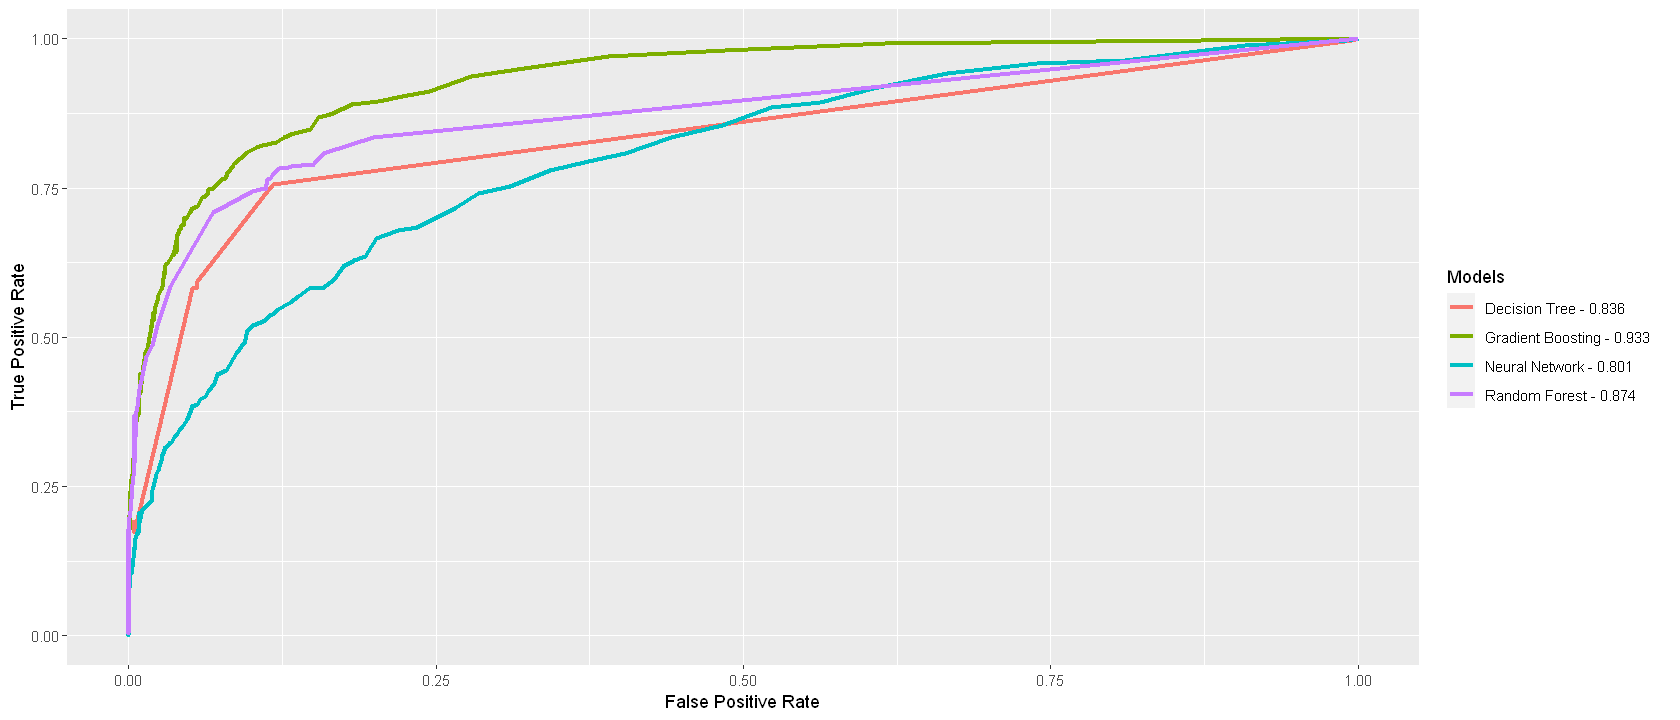

In [62]:
# Cria curva ROC
options(repr.plot.width=14, repr.plot.height=6)

plot <- ggplot(data = roc.df[c('FPR', 'Sensitivity', 'Models', "CutOff")],
    aes(x = FPR, y = Sensitivity, colour = Models, cutoff = CutOff)) +
    geom_line(size =1.2) +
    labs(x = 'False Positive Rate', y = 'True Positive Rate')
plot

In [63]:
library('magrittr')

In [64]:
p <- plotly::ggplotly(plot) %>% plotly::layout(plot, hovermode = "x")

plotly::embed_notebook(p)

<iframe src="data:text/html;charset=utf-8;base64,PCFET0NUWVBFIGh0bWw+DQo8aHRtbD4NCjxoZWFkPg0KPG1ldGEgY2hhcnNldD0idXRmLTgiIC8+DQo8dGl0bGU+cGxvdGx5PC90aXRsZT4NCjxzY3JpcHQ+KGZ1bmN0aW9uKCkgew0KICAvLyBJZiB3aW5kb3cuSFRNTFdpZGdldHMgaXMgYWxyZWFkeSBkZWZpbmVkLCB0aGVuIHVzZSBpdDsgb3RoZXJ3aXNlIGNyZWF0ZSBhDQogIC8vIG5ldyBvYmplY3QuIFRoaXMgYWxsb3dzIHByZWNlZGluZyBjb2RlIHRvIHNldCBvcHRpb25zIHRoYXQgYWZmZWN0IHRoZQ0KICAvLyBpbml0aWFsaXphdGlvbiBwcm9jZXNzICh0aG91Z2ggbm9uZSBjdXJyZW50bHkgZXhpc3QpLg0KICB3aW5kb3cuSFRNTFdpZGdldHMgPSB3aW5kb3cuSFRNTFdpZGdldHMgfHwge307DQoNCiAgLy8gU2VlIGlmIHdlJ3JlIHJ1bm5pbmcgaW4gYSB2aWV3ZXIgcGFuZS4gSWYgbm90LCB3ZSdyZSBpbiBhIHdlYiBicm93c2VyLg0KICB2YXIgdmlld2VyTW9kZSA9IHdpbmRvdy5IVE1MV2lkZ2V0cy52aWV3ZXJNb2RlID0NCiAgICAgIC9cYnZpZXdlcl9wYW5lPTFcYi8udGVzdCh3aW5kb3cubG9jYXRpb24pOw0KDQogIC8vIFNlZSBpZiB3ZSdyZSBydW5uaW5nIGluIFNoaW55IG1vZGUuIElmIG5vdCwgaXQncyBhIHN0YXRpYyBkb2N1bWVudC4NCiAgLy8gTm90ZSB0aGF0IHN0YXRpYyB3aWRnZXRzIGNhbiBhcHBlYXIgaW4gYm90aCBTaGlueSBhbmQgc3RhdGljIG1vZGVzLCBidXQNCiAgLy8gb2J2aW91c2x5LCBTaGlueSB3aWRnZXRzIGNhbiBvbmx5IGFwcGVhciBpbiBTaGlueSBhcHBzL2RvY3VtZW50cy4NCiAgdmFyIHNoaW55TW9kZSA9IHdpbmRvdy5IVE1MV2lkZ2V0cy5zaGlueU1vZGUgPQ0KICAgICAgdHlwZW9mKHdpbmRvdy5TaGlueSkgIT09ICJ1bmRlZmluZWQiICYmICEhd2luZG93LlNoaW55Lm91dHB1dEJpbmRpbmdzOw0KDQogIC8vIFdlIGNhbid0IGNvdW50IG9uIGpRdWVyeSBiZWluZyBhdmFpbGFibGUsIHNvIHdlIGltcGxlbWVudCBvdXIgb3duDQogIC8vIHZlcnNpb24gaWYgbmVjZXNzYXJ5Lg0KICBmdW5jdGlvbiBxdWVyeVNlbGVjdG9yQWxsKHNjb3BlLCBzZWxlY3Rvcikgew0KICAgIGlmICh0eXBlb2YoalF1ZXJ5KSAhPT0gInVuZGVmaW5lZCIgJiYgc2NvcGUgaW5zdGFuY2VvZiBqUXVlcnkpIHsNCiAgICAgIHJldHVybiBzY29wZS5maW5kKHNlbGVjdG9yKTsNCiAgICB9DQogICAgaWYgKHNjb3BlLnF1ZXJ5U2VsZWN0b3JBbGwpIHsNCiAgICAgIHJldHVybiBzY29wZS5xdWVyeVNlbGVjdG9yQWxsKHNlbGVjdG9yKTsNCiAgICB9DQogIH0NCg0KICBmdW5jdGlvbiBhc0FycmF5KHZhbHVlKSB7DQogICAgaWYgKHZhbHVlID09PSBudWxsKQ0KICAgICAgcmV0dXJuIFtdOw0KICAgIGlmICgkLmlzQXJyYXkodmFsdWUpKQ0KICAgICAgcmV0dXJuIHZhbHVlOw0KICAgIHJldHVybiBbdmFsdWVdOw0KICB9DQoNCiAgLy8gSW1wbGVtZW50IGpRdWVyeSdzIGV4dGVuZA0KICBmdW5jdGlvbiBleHRlbmQodGFyZ2V0IC8qLCAuLi4gKi8pIHsNCiAgICBpZiAoYXJndW1lbnRzLmxlbmd0aCA9PSAxKSB7DQogICAgICByZXR1cm4gdGFyZ2V0Ow0KICAgIH0NCiAgICBmb3IgKHZhciBpID0gMTsgaSA8IGFyZ3VtZW50cy5sZW5ndGg7IGkrKykgew0KICAgICAgdmFyIHNvdXJjZSA9IGFyZ3VtZW50c1tpXTsNCiAgICAgIGZvciAodmFyIHByb3AgaW4gc291cmNlKSB7DQogICAgICAgIGlmIChzb3VyY2UuaGFzT3duUHJvcGVydHkocHJvcCkpIHsNCiAgICAgICAgICB0YXJnZXRbcHJvcF0gPSBzb3VyY2VbcHJvcF07DQogICAgICAgIH0NCiAgICAgIH0NCiAgICB9DQogICAgcmV0dXJuIHRhcmdldDsNCiAgfQ0KDQogIC8vIElFOCBkb2Vzbid0IHN1cHBvcnQgQXJyYXkuZm9yRWFjaC4NCiAgZnVuY3Rpb24gZm9yRWFjaCh2YWx1ZXMsIGNhbGxiYWNrLCB0aGlzQXJnKSB7DQogICAgaWYgKHZhbHVlcy5mb3JFYWNoKSB7DQogICAgICB2YWx1ZXMuZm9yRWFjaChjYWxsYmFjaywgdGhpc0FyZyk7DQogICAgfSBlbHNlIHsNCiAgICAgIGZvciAodmFyIGkgPSAwOyBpIDwgdmFsdWVzLmxlbmd0aDsgaSsrKSB7DQogICAgICAgIGNhbGxiYWNrLmNhbGwodGhpc0FyZywgdmFsdWVzW2ldLCBpLCB2YWx1ZXMpOw0KICAgICAgfQ0KICAgIH0NCiAgfQ0KDQogIC8vIFJlcGxhY2VzIHRoZSBzcGVjaWZpZWQgbWV0aG9kIHdpdGggdGhlIHJldHVybiB2YWx1ZSBvZiBmdW5jU291cmNlLg0KICAvLw0KICAvLyBOb3RlIHRoYXQgZnVuY1NvdXJjZSBzaG91bGQgbm90IEJFIHRoZSBuZXcgbWV0aG9kLCBpdCBzaG91bGQgYmUgYSBmdW5jdGlvbg0KICAvLyB0aGF0IFJFVFVSTlMgdGhlIG5ldyBtZXRob2QuIGZ1bmNTb3VyY2UgcmVjZWl2ZXMgYSBzaW5nbGUgYXJndW1lbnQgdGhhdCBpcw0KICAvLyB0aGUgb3ZlcnJpZGRlbiBtZXRob2QsIGl0IGNhbiBiZSBjYWxsZWQgZnJvbSB0aGUgbmV3IG1ldGhvZC4gVGhlIG92ZXJyaWRkZW4NCiAgLy8gbWV0aG9kIGNhbiBiZSBjYWxsZWQgbGlrZSBhIHJlZ3VsYXIgZnVuY3Rpb24sIGl0IGhhcyB0aGUgdGFyZ2V0IHBlcm1hbmVudGx5DQogIC8vIGJvdW5kIHRvIGl0IHNvICJ0aGlzIiB3aWxsIHdvcmsgY29ycmVjdGx5Lg0KICBmdW5jdGlvbiBvdmVycmlkZU1ldGhvZCh0YXJnZXQsIG1ldGhvZE5hbWUsIGZ1bmNTb3VyY2UpIHsNCiAgICB2YXIgc3VwZXJGdW5jID0gdGFyZ2V0W21ldGhvZE5hbWVdIHx8IGZ1bmN0aW9uKCkge307DQogICAgdmFyIHN1cGVyRnVuY0JvdW5kID0gZnVuY3Rpb24oKSB7DQogICAgICByZXR1cm4gc3VwZXJGdW5jLmFwcGx5KHRhcmdldCwgYXJndW1lbnRzKTsNCiAgICB9Ow0KICAgIHRhcmdldFttZXRob2ROYW1lXSA9IGZ1bmNTb3VyY2Uoc3VwZXJGdW5jQm91bmQpOw0KICB9DQoNCiAgLy8gQWRkIGEgbWV0aG9kIHRvIGRlbGVnYXRvciB0aGF0LCB3aGVuIGludm9rZWQsIGNhbGxzDQogIC8vIGRlbGVnYXRlZS5tZXRob2ROYW1lLiBJZiB0aGVyZSBpcyBubyBzdWNoIG1ldGhvZCBvbg0KICAvLyB0aGUgZGV

In [65]:
# Fim sessao
cas.session.endSession(conn)

list()